## Machine Learning- Bike Sharing

- Reading & Visualization of Data
- Preparing the data(Train Test Split & Rescaling)
- Training the model
- Residual Analysis
- Prediction & Evaluation

## Importing libraries 

In [119]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


## Reading the data set

In [120]:
bike= pd.read_csv('day (3).csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [121]:
bike.shape

(730, 16)

In [122]:
## No missing values present in the data set.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [123]:
## Converting the numeric column to categorical column

bike['season'] = bike['season'].astype(object)
bike['yr']= bike['yr'].astype(object)
bike['mnth']=bike['mnth'].astype(object)
bike['holiday']=bike['holiday'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike['workingday']=bike['workingday'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)


In [124]:
## Drop unnecessary column: As instant doesn't hold any significance in analysis.

bike.drop(columns=['instant','dteday'],axis=1,inplace= True)

In [125]:
bike.info()
bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
std      7.506729    8.150308   14.237589    5.195841   686.479875   
min      2.424346    3.953480    0.000000    1.500244     2.000000   
25%     13.811885   16.889713   52.000000    9.041650   316.250000   
50%     20.465826   24.368225   62.625000   12.125325   717.000000   
75%     26.880615   30.445775   72.989575   15.625589  1096.500000   
max     35.328347   42.044800   97.250000   34.000021  3410.000000   

        registered          cnt  
count   730.000000   730.000000  
mean   3658.757534  4508.006849  
std    1559.758728  1936.011647  
min      20.000000    22.000000  
25%    2502.250000  3169.750000  
50%    3664.500000  4548.500000  
75%    4783.250000  5966.000000  
max    6946.000000  8714.000000

## Creating new DataFrame, for plotting a pairplot as python is assuming the categorical columns to be numeric.



In [126]:
bike_numeric_df= pd.DataFrame()
bike_numeric_df['temp']= bike['temp']
bike_numeric_df['atemp']= bike['atemp']
bike_numeric_df['hum']= bike['hum']
bike_numeric_df['windspeed']= bike['windspeed']
bike_numeric_df['casual']= bike['casual']
bike_numeric_df['registered']= bike['registered']
bike_numeric_df['cnt']= bike['cnt']
bike_numeric_df

temp     atemp      hum  windspeed  casual  registered   cnt
0    14.110847  18.18125  80.5833  10.749882     331         654   985
1    14.902598  17.68695  69.6087  16.652113     131         670   801
2     8.050924   9.47025  43.7273  16.636703     120        1229  1349
3     8.200000  10.60610  59.0435  10.739832     108        1454  1562
4     9.305237  11.46350  43.6957  12.522300      82        1518  1600
..         ...       ...      ...        ...     ...         ...   ...
725  10.420847  11.33210  65.2917  23.458911     247        1867  2114
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341
728  10.489153  11.58500  48.3333  23.500518     364        1432  1796
729   8.849153  11.17435  57.7500  10.374682     439        2290  2729

[730 rows x 7 columns]

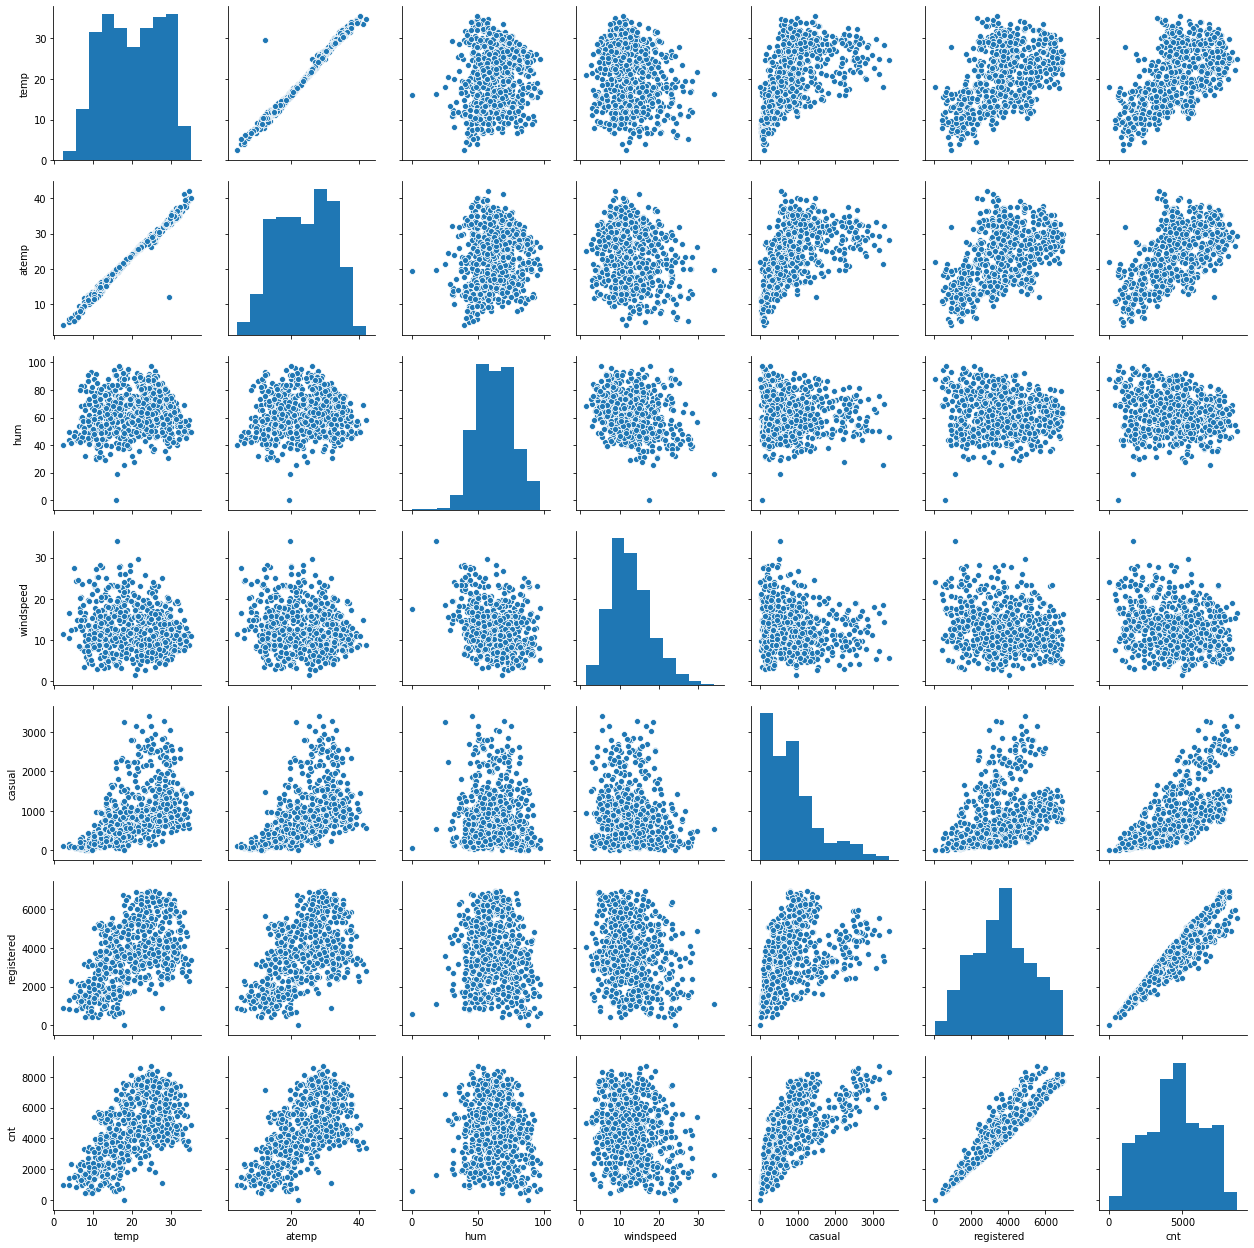

In [127]:
## Visualization of numeric varibale

sns.pairplot(bike_numeric_df)
plt.show()

In [128]:
## Visualization of categorical varibale

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data= bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data= bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data= bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data= bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data= bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data= bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data= bike)
plt.show()



## Creating Dummies 

In [129]:
dummies= pd.get_dummies(bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']], drop_first=True)

In [130]:
bike= pd.concat([bike,dummies],axis=1)

In [131]:
## Drop the original columns as dummies as created 

bike.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'], inplace= True , axis=1)

In [132]:
bike.shape

(730, 32)

## Splitting data into Train & Test

In [133]:
# Train & Test Split

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [134]:
## Scaling the numerical column using Min Max Scaling for both train and test split df.

scaler= MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','casual','registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [135]:
df_train.head()

temp     atemp       hum  windspeed    casual  registered   cnt  \
653  0.509887  0.501133  0.575354   0.300794  0.280402    0.951776  7534   
576  0.815169  0.766351  0.725633   0.264686  0.294422    0.899220  7216   
426  0.442393  0.438975  0.640189   0.255342  0.290765    0.446145  4066   
728  0.245101  0.200348  0.498067   0.663106  0.110332    0.203869  1796   
482  0.395666  0.391735  0.504508   0.188475  0.340750    0.444701  4220   

     season_2  season_3  season_4  ...  holiday_1  weekday_1  weekday_2  \
653         0         0         1  ...          0          0          1   
576         0         1         0  ...          0          0          1   
426         0         0         0  ...          0          0          0   
728         0         0         0  ...          0          0          0   
482         1         0         0  ...          0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  \
653          0          0          0          0             1             0   
576          0          0          0          0             1             0   
426          0          0          0          1             0             1   
728          0          0          0          0             0             0   
482          0          0          0          1             0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 32 columns]

In [136]:
## Checking the correlation between the features.

plt.figure(figsize=(30,10))
sns.heatmap(df_train.corr(),annot=True,cmap= 'YlGnBu')

In [137]:
# as the feature 'registered' is highly correlated with target variable and there is a linear correlation.

plt.figure(figsize=[6,6])
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

In [138]:
## Correlation between the target and feature variables

df_train.corr().sort_values(by='cnt', axis=0)['cnt']

mnth_2         -0.270287
windspeed      -0.253794
weathersit_3   -0.226598
weathersit_2   -0.175530
mnth_12        -0.143598
mnth_3         -0.137537
holiday_1      -0.095961
hum            -0.059993
mnth_11        -0.048130
weekday_6      -0.016215
weekday_1      -0.009552
weekday_4       0.009710
mnth_4          0.022998
weekday_5       0.024581
weekday_3       0.025216
weekday_2       0.031883
season_4        0.032636
mnth_10         0.065692
workingday_1    0.092320
mnth_5          0.113027
season_2        0.134343
mnth_7          0.157812
mnth_6          0.187821
mnth_9          0.201327
mnth_8          0.227229
season_3        0.371606
yr_1            0.591508
temp            0.643517
atemp           0.646475
casual          0.670830
registered      0.948361
cnt             1.000000
Name: cnt, dtype: float64

## Dividing the X and Y set for model building

In [139]:
y_train= df_train.pop('cnt')
X_train= df_train


## Builidng a linear model with highly corrrelated variable first

In [140]:
import statsmodels.api as sm

#Adding a constant

X_train_lm= sm.add_constant(X_train[['registered']])

## Create the first model

lr= sm.OLS(y_train,X_train_lm).fit()


In [141]:
## Checking the param

lr.params

const          235.227932
registered    8113.750368
dtype: float64

In [142]:
## Check the summary

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.75e-255
Time:                        20:27:31   Log-Likelihood:                -4001.7
No. Observations:                 510   AIC:                             8007.
Df Residuals:                     508   BIC:                             8016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.2279     68.797      3.419      0.001     100.067     370.389
registered  8113.7504    120.404     67.388      0.000    7877.200    8350.301
==============================================================================
Omnibus:                      134.360   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.307
Skew:                           1.511   Prob(JB):                     3.64e-56
Kurtosis:                       4.699   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding next highly correlated variable 

In [143]:
## Building the 2nd model

#Adding a constant

X_train_lm= sm.add_constant(X_train[['registered','casual']])

## Create the first model

lr_1= sm.OLS(y_train,X_train_lm).fit()

In [144]:
## Checking params

lr_1.params

const           22.0
registered    6926.0
casual        3281.0
dtype: float64

In [145]:
## Checking summary

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.471e+32
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:31   Log-Likelihood:                 12889.
No. Observations:                 510   AIC:                        -2.577e+04
Df Residuals:                     507   BIC:                        -2.576e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   2.88e-13   7.65e+13      0.000      22.000      22.000
registered  6926.0000   5.44e-13   1.27e+16      0.000    6926.000    6926.000
casual      3281.0000   6.03e-13   5.44e+15      0.000    3281.000    3281.000
==============================================================================
Omnibus:                       39.980   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.628
Skew:                           0.744   Prob(JB):                     4.55e-11
Kurtosis:                       3.163   Cond. No.                         7.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cerating the model with all the variables.

In [146]:
## Builidng 3rd Model

X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.309e+29
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:31   Log-Likelihood:                 12106.
No. Observations:                 510   AIC:                        -2.415e+04
Df Residuals:                     479   BIC:                        -2.402e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    4.4e-12      5e+12      0.000      22.000      22.000
temp          1.273e-11   1.99e-11      0.639      0.523   -2.64e-11    5.19e-11
atemp        -7.276e-12   1.92e-11     -0.380      0.704   -4.49e-11    3.04e-11
hum          -2.842e-12   5.42e-12     -0.524      0.600   -1.35e-11    7.81e-12
windspeed    -3.183e-12   3.84e-12     -0.829      0.407   -1.07e-11    4.36e-12
casual        3281.0000   5.58e-12   5.88e+14      0.000    3281.000    3281.000
registered    6926.0000   6.63e-12   1.04e+15      0.000    6926.000    6926.000
season_2     -5.684e-13   3.31e-12     -0.172      0.864   -7.08e-12    5.94e-12
season_3      4.547e-13   4.17e-12      0.109      0.913   -7.74e-12    8.65e-12
season_4      5.002e-12    3.8e-12      1.316      0.189   -2.47e-12    1.25e-11
yr_1          3.169e-12   1.96e-12      1.617      0.107   -6.82e-13    7.02e-12
mnth_2       -2.274e-13   2.86e-12     -0.079      0.937   -5.86e-12     5.4e-12
mnth_3        1.819e-12   3.12e-12      0.582      0.561   -4.32e-12    7.96e-12
mnth_4        1.876e-12   4.66e-12      0.402      0.688   -7.29e-12     1.1e-11
mnth_5       -1.222e-12   5.04e-12     -0.242      0.809   -1.11e-11    8.69e-12
mnth_6        3.411e-13   5.43e-12      0.063      0.950   -1.03e-11     1.1e-11
mnth_7        3.411e-13    6.1e-12      0.056      0.955   -1.16e-11    1.23e-11
mnth_8       -3.411e-13   5.84e-12     -0.058      0.953   -1.18e-11    1.11e-11
mnth_9        6.821e-13   5.27e-12      0.129      0.897   -9.67e-12     1.1e-11
mnth_10      -4.206e-12   4.81e-12     -0.875      0.382   -1.37e-11    5.24e-12
mnth_11      -4.547e-13   4.55e-12     -0.100      0.920    -9.4e-12    8.49e-12
mnth_12      -2.018e-12   3.67e-12     -0.549      0.583   -9.23e-12     5.2e-12
holiday_1     3.098e-12    3.3e-12      0.940      0.348   -3.38e-12    9.58e-12
weekday_1    -3.155e-12   1.38e-12     -2.288      0.023   -5.86e-12   -4.45e-13
weekday_2    -3.752e-12   1.61e-12     -2.332      0.020   -6.91e-12    -5.9e-13
weekday_3    -1.876e-12   1.55e-12     -1.214      0.225   -4.91e-12    1.16e-12
weekday_4    -4.242e-12   1.57e-12     -2.708      0.007   -7.32e-12   -1.16e-12
weekday_5    -4.619e-12   1.56e-12     -2.959      0.003   -7.69e-12   -1.55e-12
weekday_6     2.274e-13   2.04e-12      0.111      0.911   -3.78e-12    4.23e-12
workingday_1  7.844e-12   2.03e-12      3.872      0.000    3.86e-12    1.18e-11
weathersit_2 -1.108e-12    1.5e-12     -0.740      0.460   -4.05e-12    1.83e-12
weathersit_3  6.821e-13   4.03e-12      0.169      0.866   -7.23e-12    8.59e-12
==============================================================================
Omnibus:                        4.672   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.358
Skew:      

In [147]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
28  workingday_1     inf
26     weekday_5     inf
25     weekday_4     inf
24     weekday_3     inf
23     weekday_2     inf
22     weekday_1     inf
21     holiday_1     inf
0           temp  457.25
1          atemp  384.53
5     registered   48.36
2            hum   21.16
7       season_3   15.55
8       season_4   12.22
16        mnth_8   11.12
4         casual   10.72
15        mnth_7    9.64
6       season_2    9.09
17        mnth_9    7.59
14        mnth_6    7.43
13        mnth_5    7.28
18       mnth_10    6.77
9           yr_1    6.61
19       mnth_11    6.03
12        mnth_4    5.72
3      windspeed    4.93
20       mnth_12    3.80
11        mnth_3    3.17
29  weathersit_2    2.48
27     weekday_6    2.06
10        mnth_2    1.75
30  weathersit_3    1.58

## Remove the Variable with HIgh P value first as it doesn't hold significiance in the analysis.

In [148]:
X = X_train.drop('mnth_7', 1)

In [149]:
## Building 4th model 

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.098e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                 12336.
No. Observations:                 510   AIC:                        -2.461e+04
Df Residuals:                     480   BIC:                        -2.448e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    2.8e-12   7.87e+12      0.000      22.000      22.000
temp          3.638e-12   1.23e-11      0.295      0.768   -2.06e-11    2.79e-11
atemp             1e-11   1.22e-11      0.820      0.412    -1.4e-11     3.4e-11
hum          -6.708e-12   3.43e-12     -1.957      0.051   -1.34e-11    2.74e-14
windspeed    -2.274e-13   2.45e-12     -0.093      0.926   -5.03e-12    4.58e-12
casual        3281.0000   3.55e-12   9.23e+14      0.000    3281.000    3281.000
registered    6926.0000   4.22e-12   1.64e+15      0.000    6926.000    6926.000
season_2       7.39e-13   1.96e-12      0.377      0.706   -3.11e-12    4.59e-12
season_3     -2.274e-12   2.15e-12     -1.057      0.291    -6.5e-12    1.95e-12
season_4     -3.979e-13   2.32e-12     -0.171      0.864   -4.96e-12    4.17e-12
yr_1          3.652e-12   1.24e-12      2.934      0.004    1.21e-12     6.1e-12
mnth_2       -3.979e-13   1.74e-12     -0.229      0.819   -3.82e-12    3.02e-12
mnth_3       -2.302e-12   1.64e-12     -1.404      0.161   -5.52e-12    9.19e-13
mnth_4       -1.563e-12   2.34e-12     -0.669      0.504   -6.16e-12    3.03e-12
mnth_5       -6.821e-13   2.37e-12     -0.288      0.774   -5.34e-12    3.98e-12
mnth_6       -1.535e-12   2.03e-12     -0.755      0.451   -5.53e-12    2.46e-12
mnth_8        9.379e-13   1.64e-12      0.572      0.568   -2.28e-12    4.16e-12
mnth_9        3.155e-12   1.76e-12      1.791      0.074   -3.07e-13    6.62e-12
mnth_10       1.734e-12    2.5e-12      0.693      0.488   -3.18e-12    6.65e-12
mnth_11       5.684e-13   2.51e-12      0.227      0.821   -4.36e-12    5.49e-12
mnth_12       2.018e-12   2.06e-12      0.980      0.328   -2.03e-12    6.07e-12
holiday_1    -3.837e-12   2.09e-12     -1.832      0.068   -7.95e-12    2.78e-13
weekday_1     2.217e-12   8.78e-13      2.524      0.012    4.91e-13    3.94e-12
weekday_2     2.615e-12   1.02e-12      2.552      0.011    6.02e-13    4.63e-12
weekday_3      3.78e-12   9.84e-13      3.843      0.000    1.85e-12    5.71e-12
weekday_4      2.59e-12   9.95e-13      2.603      0.010    6.35e-13    4.54e-12
weekday_5     4.363e-12   9.94e-13      4.390      0.000    2.41e-12    6.32e-12
weekday_6    -9.095e-13    1.3e-12     -0.700      0.484   -3.46e-12    1.64e-12
workingday_1 -1.521e-12   1.29e-12     -1.179      0.239   -4.05e-12    1.01e-12
weathersit_2 -4.263e-14   9.53e-13     -0.045      0.964   -1.91e-12    1.83e-12
weathersit_3  3.979e-12   2.56e-12      1.554      0.121   -1.05e-12    9.01e-12
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.257
Skew:                          -0.043   Prob(JB):                        0.879
Kurtosis:    

In [150]:
 ## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
24     weekday_4     inf
25     weekday_5     inf
23     weekday_3     inf
22     weekday_2     inf
21     weekday_1     inf
20     holiday_1     inf
27  workingday_1     inf
0           temp  431.89
1          atemp  383.45
5     registered   48.29
2            hum   20.87
8       season_4   11.26
4         casual   10.72
7       season_3   10.17
6       season_2    7.86
9           yr_1    6.57
3      windspeed    4.92
17       mnth_10    4.52
18       mnth_11    4.52
13        mnth_5    3.97
12        mnth_4    3.56
19       mnth_12    2.95
14        mnth_6    2.57
28  weathersit_2    2.48
11        mnth_3    2.16
15        mnth_8    2.15
16        mnth_9    2.07
26     weekday_6    2.06
10        mnth_2    1.59
29  weathersit_3    1.57

In [151]:
## Dropping the next insignificant column

X_1 = X.drop('weathersit_2', 1)

In [152]:
## Building 5th model 

X_train_lm = sm.add_constant(X_1)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.025e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                 12482.
No. Observations:                 510   AIC:                        -2.491e+04
Df Residuals:                     481   BIC:                        -2.478e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   2.04e-12   1.08e+13      0.000      22.000      22.000
temp          1.819e-12   9.24e-12      0.197      0.844   -1.63e-11       2e-11
atemp                 0   9.14e-12          0      1.000    -1.8e-11     1.8e-11
hum           7.731e-12   2.23e-12      3.470      0.001    3.35e-12    1.21e-11
windspeed     2.501e-12   1.83e-12      1.366      0.173    -1.1e-12     6.1e-12
casual        3281.0000   2.66e-12   1.23e+15      0.000    3281.000    3281.000
registered    6926.0000   3.09e-12   2.24e+15      0.000    6926.000    6926.000
season_2     -9.663e-13   1.46e-12     -0.660      0.509   -3.84e-12    1.91e-12
season_3     -4.547e-13    1.6e-12     -0.283      0.777   -3.61e-12     2.7e-12
season_4     -1.705e-12   1.73e-12     -0.985      0.325   -5.11e-12     1.7e-12
yr_1          3.979e-12   9.06e-13      4.390      0.000     2.2e-12    5.76e-12
mnth_2        2.103e-12    1.3e-12      1.612      0.108    -4.6e-13    4.67e-12
mnth_3        2.757e-12   1.23e-12      2.246      0.025    3.45e-13    5.17e-12
mnth_4       -6.111e-13   1.75e-12     -0.349      0.727   -4.05e-12    2.83e-12
mnth_5       -1.819e-12   1.78e-12     -1.024      0.306   -5.31e-12    1.67e-12
mnth_6       -4.263e-14   1.52e-12     -0.028      0.978   -3.03e-12    2.95e-12
mnth_8        6.111e-13   1.23e-12      0.498      0.618    -1.8e-12    3.02e-12
mnth_9       -9.663e-13   1.32e-12     -0.734      0.464   -3.55e-12    1.62e-12
mnth_10      -3.098e-12   1.87e-12     -1.653      0.099   -6.78e-12    5.85e-13
mnth_11      -1.705e-12   1.88e-12     -0.908      0.364   -5.39e-12    1.98e-12
mnth_12      -5.684e-14   1.54e-12     -0.037      0.971   -3.08e-12    2.97e-12
holiday_1     3.695e-13   1.57e-12      0.235      0.814   -2.71e-12    3.45e-12
weekday_1    -2.444e-12   6.58e-13     -3.713      0.000   -3.74e-12   -1.15e-12
weekday_2    -3.922e-12   7.68e-13     -5.107      0.000   -5.43e-12   -2.41e-12
weekday_3     1.705e-13   7.37e-13      0.231      0.817   -1.28e-12    1.62e-12
weekday_4     1.116e-12   7.46e-13      1.496      0.135    -3.5e-13    2.58e-12
weekday_5     7.532e-13   7.41e-13      1.016      0.310   -7.03e-13    2.21e-12
weekday_6     2.842e-12   9.67e-13      2.939      0.003    9.42e-13    4.74e-12
workingday_1    8.1e-13    9.6e-13      0.844      0.399   -1.08e-12     2.7e-12
weathersit_3 -1.251e-12   1.77e-12     -0.708      0.479   -4.72e-12    2.22e-12
==============================================================================
Omnibus:                        2.740   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.816
Skew:                          -0.172   Prob(JB):                        0.245
Kurtosis:                       2.880   Cond. No.                     2.25e+15
===============

In [153]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
25     weekday_5     inf
27  workingday_1     inf
20     holiday_1     inf
23     weekday_3     inf
24     weekday_4     inf
22     weekday_2     inf
21     weekday_1     inf
0           temp  431.89
1          atemp  383.38
5     registered   45.20
2            hum   15.63
8       season_4   11.11
4         casual   10.54
7       season_3   10.08
6       season_2    7.76
9           yr_1    6.14
3      windspeed    4.89
17       mnth_10    4.52
18       mnth_11    4.50
13        mnth_5    3.97
12        mnth_4    3.56
19       mnth_12    2.93
14        mnth_6    2.57
11        mnth_3    2.16
15        mnth_8    2.14
16        mnth_9    2.05
26     weekday_6    2.05
10        mnth_2    1.59
28  weathersit_3    1.36

In [154]:
## Dropping the next insignificant column

X_2 = X_1.drop('atemp', 1)

In [155]:
## Building 6th model 

X_train_lm = sm.add_constant(X_2)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.953e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:33   Log-Likelihood:                 12569.
No. Observations:                 510   AIC:                        -2.508e+04
Df Residuals:                     482   BIC:                        -2.496e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.72e-12   1.28e+13      0.000      22.000      22.000
temp          7.503e-12   2.41e-12      3.111      0.002    2.76e-12    1.22e-11
hum           7.105e-13   1.88e-12      0.379      0.705   -2.98e-12     4.4e-12
windspeed    -2.501e-12   1.51e-12     -1.654      0.099   -5.47e-12    4.69e-13
casual        3281.0000   2.24e-12   1.46e+15      0.000    3281.000    3281.000
registered    6926.0000    2.6e-12   2.66e+15      0.000    6926.000    6926.000
season_2     -9.663e-13   1.23e-12     -0.783      0.434   -3.39e-12    1.46e-12
season_3     -3.865e-12   1.35e-12     -2.870      0.004   -6.51e-12   -1.22e-12
season_4      -7.39e-13   1.46e-12     -0.506      0.613   -3.61e-12    2.13e-12
yr_1          2.046e-12   7.64e-13      2.680      0.008    5.46e-13    3.55e-12
mnth_2        -1.08e-12    1.1e-12     -0.982      0.327   -3.24e-12    1.08e-12
mnth_3        2.842e-13   1.03e-12      0.275      0.784   -1.75e-12    2.32e-12
mnth_4        2.331e-12   1.47e-12      1.581      0.115   -5.66e-13    5.23e-12
mnth_5         7.39e-13    1.5e-12      0.493      0.622    -2.2e-12    3.68e-12
mnth_6        9.095e-13   1.28e-12      0.709      0.478   -1.61e-12    3.43e-12
mnth_8       -7.105e-13   1.03e-12     -0.691      0.490   -2.73e-12    1.31e-12
mnth_9       -1.336e-12   1.11e-12     -1.202      0.230   -3.52e-12    8.47e-13
mnth_10      -2.842e-13   1.58e-12     -0.180      0.857   -3.39e-12    2.82e-12
mnth_11       2.274e-13   1.58e-12      0.144      0.886   -2.88e-12    3.33e-12
mnth_12      -1.279e-13    1.3e-12     -0.099      0.922   -2.68e-12    2.42e-12
holiday_1       5.4e-12   1.32e-12      4.090      0.000    2.81e-12    7.99e-12
weekday_1    -4.491e-12   5.55e-13     -8.092      0.000   -5.58e-12    -3.4e-12
weekday_2    -3.524e-12   6.47e-13     -5.444      0.000    -4.8e-12   -2.25e-12
weekday_3    -2.586e-12   6.21e-13     -4.166      0.000   -3.81e-12   -1.37e-12
weekday_4    -6.068e-12   6.29e-13     -9.650      0.000    -7.3e-12   -4.83e-12
weekday_5    -3.809e-12    6.2e-13     -6.138      0.000   -5.03e-12   -2.59e-12
weekday_6     6.821e-13   8.15e-13      0.837      0.403    -9.2e-13    2.28e-12
workingday_1  2.515e-12   8.09e-13      3.109      0.002    9.26e-13    4.11e-12
weathersit_3  3.752e-12   1.49e-12      2.525      0.012    8.33e-13    6.67e-12
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.204
Skew:                           0.003   Prob(JB):                        0.903
Kurtosis:                       3.098   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] St

In [156]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
22     weekday_3    inf
26  workingday_1    inf
21     weekday_2    inf
20     weekday_1    inf
19     holiday_1    inf
24     weekday_5    inf
23     weekday_4    inf
4     registered  45.08
0           temp  41.40
1            hum  15.47
7       season_4  11.10
3         casual  10.53
6       season_3   9.99
5       season_2   7.76
8           yr_1   6.12
2      windspeed   4.67
16       mnth_10   4.51
17       mnth_11   4.49
12        mnth_5   3.96
11        mnth_4   3.54
18       mnth_12   2.92
13        mnth_6   2.56
10        mnth_3   2.15
14        mnth_8   2.11
15        mnth_9   2.05
25     weekday_6   2.05
9         mnth_2   1.59
27  weathersit_3   1.35

In [157]:
## Dropping the next insignificant column

X_3 = X_2.drop('mnth_12', 1)

In [158]:
## Building 7th model 

X_train_lm = sm.add_constant(X_3)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.062e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:33   Log-Likelihood:                 12568.
No. Observations:                 510   AIC:                        -2.508e+04
Df Residuals:                     483   BIC:                        -2.497e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.71e-12   1.29e+13      0.000      22.000      22.000
temp          6.594e-12   2.39e-12      2.764      0.006    1.91e-12    1.13e-11
hum          -1.023e-12   1.87e-12     -0.547      0.585    -4.7e-12    2.65e-12
windspeed    -9.663e-13   1.51e-12     -0.640      0.522   -3.93e-12       2e-12
casual        3281.0000   2.24e-12   1.46e+15      0.000    3281.000    3281.000
registered    6926.0000    2.6e-12   2.66e+15      0.000    6926.000    6926.000
season_2      9.095e-13   1.23e-12      0.737      0.462   -1.52e-12    3.34e-12
season_3     -7.958e-13   1.35e-12     -0.591      0.555   -3.44e-12    1.85e-12
season_4     -1.137e-12    1.2e-12     -0.947      0.344    -3.5e-12    1.22e-12
yr_1          1.137e-12   7.63e-13      1.490      0.137   -3.62e-13    2.64e-12
mnth_2       -3.979e-13   1.07e-12     -0.373      0.709   -2.49e-12     1.7e-12
mnth_3        7.105e-15   1.01e-12      0.007      0.994   -1.97e-12    1.99e-12
mnth_4        1.421e-13   1.46e-12      0.097      0.922   -2.73e-12    3.01e-12
mnth_5       -7.958e-13   1.49e-12     -0.535      0.593   -3.72e-12    2.13e-12
mnth_6       -1.336e-12   1.28e-12     -1.047      0.295   -3.84e-12    1.17e-12
mnth_8       -9.379e-13   1.01e-12     -0.925      0.355   -2.93e-12    1.05e-12
mnth_9       -1.762e-12   1.04e-12     -1.698      0.090    -3.8e-12    2.77e-13
mnth_10      -9.095e-13   1.17e-12     -0.775      0.439   -3.22e-12     1.4e-12
mnth_11      -1.705e-12   1.14e-12     -1.500      0.134   -3.94e-12    5.29e-13
holiday_1    -1.165e-12   1.32e-12     -0.883      0.377   -3.76e-12    1.43e-12
weekday_1     -1.08e-12   5.55e-13     -1.945      0.052   -2.17e-12     1.1e-14
weekday_2    -1.592e-12   6.48e-13     -2.457      0.014   -2.86e-12   -3.19e-13
weekday_3     2.274e-13   6.21e-13      0.366      0.715   -9.93e-13    1.45e-12
weekday_4    -1.315e-12   6.28e-13     -2.093      0.037   -2.55e-12   -8.05e-14
weekday_5    -2.416e-12   6.21e-13     -3.892      0.000   -3.64e-12    -1.2e-12
weekday_6    -1.592e-12   8.16e-13     -1.951      0.052   -3.19e-12    1.17e-14
workingday_1 -1.506e-12   8.09e-13     -1.862      0.063    -3.1e-12    8.32e-14
weathersit_3  2.615e-12   1.49e-12      1.759      0.079   -3.06e-13    5.54e-12
==============================================================================
Omnibus:                        1.312   Durbin-Watson:                   0.409
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.369
Skew:                          -0.120   Prob(JB):                        0.504
Kurtosis:                       2.917   Cond. No.                     9.26e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [159]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_3.columns
vif['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25  workingday_1    inf
18     holiday_1    inf
20     weekday_2    inf
21     weekday_3    inf
22     weekday_4    inf
23     weekday_5    inf
19     weekday_1    inf
4     registered  44.84
0           temp  40.43
1            hum  14.26
3         casual  10.53
6       season_3   9.97
5       season_2   7.76
7       season_4   7.49
8           yr_1   6.10
2      windspeed   4.55
12        mnth_5   3.91
11        mnth_4   3.48
13        mnth_6   2.53
16       mnth_10   2.44
17       mnth_11   2.33
10        mnth_3   2.05
24     weekday_6   2.05
14        mnth_8   2.04
15        mnth_9   1.75
9         mnth_2   1.51
26  weathersit_3   1.35

In [160]:
## Dropping the next insignificant column

X_4 = X_3.drop('mnth_3', 1)

In [161]:
## Building 8th model 

X_train_lm = sm.add_constant(X_4)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.398e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:33   Log-Likelihood:                 12944.
No. Observations:                 510   AIC:                        -2.584e+04
Df Residuals:                     484   BIC:                        -2.573e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   8.09e-13   2.72e+13      0.000      22.000      22.000
temp          7.958e-13   1.14e-12      0.701      0.484   -1.44e-12    3.03e-12
hum           1.336e-12   8.92e-13      1.497      0.135   -4.17e-13    3.09e-12
windspeed     1.364e-12   7.16e-13      1.906      0.057   -4.18e-14    2.77e-12
casual        3281.0000   1.06e-12   3.09e+15      0.000    3281.000    3281.000
registered    6926.0000   1.24e-12   5.59e+15      0.000    6926.000    6926.000
season_2     -2.842e-12   5.77e-13     -4.925      0.000   -3.98e-12   -1.71e-12
season_3     -2.956e-12   6.14e-13     -4.817      0.000   -4.16e-12   -1.75e-12
season_4     -6.821e-13   5.44e-13     -1.254      0.210   -1.75e-12    3.87e-13
yr_1          -2.97e-12   3.63e-13     -8.179      0.000   -3.68e-12   -2.26e-12
mnth_2        2.615e-12   4.79e-13      5.458      0.000    1.67e-12    3.56e-12
mnth_4        1.222e-12   6.03e-13      2.026      0.043    3.68e-14    2.41e-12
mnth_5       -1.876e-12   6.13e-13     -3.061      0.002   -3.08e-12   -6.72e-13
mnth_6         1.99e-13   5.48e-13      0.363      0.717   -8.78e-13    1.28e-12
mnth_8        2.245e-12    4.8e-13      4.680      0.000     1.3e-12    3.19e-12
mnth_9        5.684e-14   4.92e-13      0.116      0.908    -9.1e-13    1.02e-12
mnth_10      -4.832e-12   5.58e-13     -8.656      0.000   -5.93e-12   -3.73e-12
mnth_11      -1.023e-12   5.42e-13     -1.886      0.060   -2.09e-12    4.26e-14
holiday_1     -3.24e-12   6.29e-13     -5.150      0.000   -4.48e-12      -2e-12
weekday_1     2.245e-12   2.65e-13      8.473      0.000    1.72e-12    2.77e-12
weekday_2     1.251e-12   3.09e-13      4.045      0.000    6.43e-13    1.86e-12
weekday_3     1.279e-12   2.97e-13      4.313      0.000    6.96e-13    1.86e-12
weekday_4     1.613e-12      3e-13      5.382      0.000    1.02e-12     2.2e-12
weekday_5     2.785e-12   2.96e-13      9.403      0.000     2.2e-12    3.37e-12
weekday_6      2.16e-12   3.89e-13      5.547      0.000    1.39e-12    2.93e-12
workingday_1 -1.961e-12   3.85e-13     -5.094      0.000   -2.72e-12    -1.2e-12
weathersit_3 -2.046e-12   7.07e-13     -2.895      0.004   -3.44e-12   -6.57e-13
==============================================================================
Omnibus:                       37.580   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.826
Skew:                           0.502   Prob(JB):                     2.28e-14
Kurtosis:                       4.396   Cond. No.                     7.86e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.77e-29. This might indicate that there are


In [162]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_4.columns
vif['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
21     weekday_4    inf
24  workingday_1    inf
20     weekday_3    inf
19     weekday_2    inf
18     weekday_1    inf
17     holiday_1    inf
22     weekday_5    inf
4     registered  44.63
0           temp  40.22
1            hum  14.17
3         casual  10.26
6       season_3   9.09
5       season_2   7.47
7       season_4   6.77
8           yr_1   6.04
2      windspeed   4.35
11        mnth_5   2.88
10        mnth_4   2.62
15       mnth_10   2.42
16       mnth_11   2.33
12        mnth_6   2.06
23     weekday_6   2.05
13        mnth_8   2.00
14        mnth_9   1.72
9         mnth_2   1.35
25  weathersit_3   1.34

In [163]:
## Dropping the next high VIF value column

X_5 = X_4.drop('mnth_9', 1)

In [164]:
## Building 9th model 

X_train_lm = sm.add_constant(X_5)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.712e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                 12515.
No. Observations:                 510   AIC:                        -2.498e+04
Df Residuals:                     485   BIC:                        -2.487e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.84e-12    1.2e+13      0.000      22.000      22.000
temp          6.992e-12    2.6e-12      2.690      0.007    1.89e-12    1.21e-11
hum          -2.103e-12   2.01e-12     -1.045      0.297   -6.06e-12    1.85e-12
windspeed     -1.08e-12   1.65e-12     -0.654      0.513   -4.32e-12    2.16e-12
casual        3281.0000   2.45e-12   1.34e+15      0.000    3281.000    3281.000
registered    6926.0000   2.81e-12   2.47e+15      0.000    6926.000    6926.000
season_2     -1.535e-12   1.34e-12     -1.149      0.251   -4.16e-12    1.09e-12
season_3     -1.137e-12   1.36e-12     -0.836      0.404   -3.81e-12    1.54e-12
season_4       2.53e-12   1.26e-12      2.015      0.044    6.29e-14       5e-12
yr_1          1.336e-12   8.25e-13      1.619      0.106   -2.85e-13    2.96e-12
mnth_2        2.103e-12   1.11e-12      1.895      0.059   -7.79e-14    4.28e-12
mnth_4        1.421e-13   1.39e-12      0.102      0.919   -2.59e-12    2.88e-12
mnth_5       -7.958e-13   1.41e-12     -0.565      0.572   -3.56e-12    1.97e-12
mnth_6        1.563e-12   1.25e-12      1.253      0.211   -8.87e-13    4.01e-12
mnth_8       -1.307e-12   1.01e-12     -1.300      0.194   -3.28e-12    6.68e-13
mnth_10      -7.958e-13   1.26e-12     -0.630      0.529   -3.28e-12    1.69e-12
mnth_11      -2.274e-13   1.23e-12     -0.184      0.854   -2.65e-12     2.2e-12
holiday_1    -3.155e-12   1.45e-12     -2.175      0.030      -6e-12   -3.05e-13
weekday_1     2.842e-13   6.14e-13      0.463      0.644   -9.22e-13    1.49e-12
weekday_2    -9.095e-13   7.16e-13     -1.270      0.205   -2.32e-12    4.98e-13
weekday_3    -1.279e-12   6.86e-13     -1.865      0.063   -2.63e-12    6.83e-14
weekday_4     -5.72e-13   6.94e-13     -0.825      0.410   -1.93e-12    7.91e-13
weekday_5    -8.527e-14   6.86e-13     -0.124      0.901   -1.43e-12    1.26e-12
weekday_6     2.387e-12   9.02e-13      2.646      0.008    6.15e-13    4.16e-12
workingday_1 -1.791e-12   8.91e-13     -2.009      0.045   -3.54e-12    -3.9e-14
weathersit_3 -1.023e-12   1.63e-12     -0.626      0.531   -4.23e-12    2.19e-12
==============================================================================
Omnibus:                       12.270   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.810
Skew:                          -0.379   Prob(JB):                      0.00165
Kurtosis:                       2.835   Cond. No.                     2.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [165]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_5.columns
vif['VIF'] = [variance_inflation_factor(X_5.values, i) for i in range(X_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
20     weekday_4    inf
23  workingday_1    inf
19     weekday_3    inf
18     weekday_2    inf
17     weekday_1    inf
16     holiday_1    inf
21     weekday_5    inf
4     registered  43.15
0           temp  39.23
1            hum  13.94
3         casual  10.23
6       season_3   8.26
5       season_2   7.44
7       season_4   6.72
8           yr_1   5.86
2      windspeed   4.35
11        mnth_5   2.85
10        mnth_4   2.60
14       mnth_10   2.33
15       mnth_11   2.24
22     weekday_6   2.04
12        mnth_6   1.98
13        mnth_8   1.66
9         mnth_2   1.35
24  weathersit_3   1.33

In [166]:
## Dropping the next insignificant column

X_6 = X_5.drop('mnth_4', 1)

In [167]:
## Building 10th model 

X_train_lm = sm.add_constant(X_6)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.params

lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.156e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                 12613.
No. Observations:                 510   AIC:                        -2.518e+04
Df Residuals:                     486   BIC:                        -2.508e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.52e-12   1.45e+13      0.000      22.000      22.000
temp          5.457e-12   2.14e-12      2.545      0.011    1.24e-12    9.67e-12
hum          -2.558e-12   1.66e-12     -1.545      0.123   -5.81e-12    6.94e-13
windspeed    -2.728e-12   1.36e-12     -2.007      0.045    -5.4e-12   -5.78e-14
casual        3281.0000   2.02e-12   1.63e+15      0.000    3281.000    3281.000
registered    6926.0000   2.32e-12   2.99e+15      0.000    6926.000    6926.000
season_2     -1.819e-12   8.54e-13     -2.131      0.034    -3.5e-12   -1.42e-13
season_3      1.705e-12   1.12e-12      1.525      0.128   -4.92e-13     3.9e-12
season_4     -9.948e-13   1.04e-12     -0.961      0.337   -3.03e-12    1.04e-12
yr_1         -1.307e-12   6.81e-13     -1.921      0.055   -2.64e-12    2.98e-14
mnth_2       -2.615e-12   9.16e-13     -2.855      0.004   -4.41e-12   -8.15e-13
mnth_5        2.615e-12   9.46e-13      2.763      0.006    7.55e-13    4.47e-12
mnth_6       -3.524e-12   9.17e-13     -3.844      0.000   -5.33e-12   -1.72e-12
mnth_8        -7.39e-12   8.26e-13     -8.943      0.000   -9.01e-12   -5.77e-12
mnth_10      -3.013e-12   1.04e-12     -2.890      0.004   -5.06e-12   -9.65e-13
mnth_11      -1.023e-12   1.02e-12     -1.006      0.315   -3.02e-12    9.76e-13
holiday_1    -8.384e-13    1.2e-12     -0.701      0.484   -3.19e-12    1.51e-12
weekday_1     1.478e-12   5.07e-13      2.917      0.004    4.82e-13    2.47e-12
weekday_2     1.705e-12   5.91e-13      2.886      0.004    5.44e-13    2.87e-12
weekday_3     5.116e-13   5.66e-13      0.904      0.366      -6e-13    1.62e-12
weekday_4     5.684e-13   5.72e-13      0.994      0.321   -5.56e-13    1.69e-12
weekday_5             0   5.66e-13          0      1.000   -1.11e-12    1.11e-12
weekday_6     7.731e-12   7.44e-13     10.392      0.000    6.27e-12    9.19e-12
workingday_1  2.572e-12   7.35e-13      3.498      0.001    1.13e-12    4.02e-12
weathersit_3  7.958e-13   1.35e-12      0.590      0.555   -1.85e-12    3.44e-12
==============================================================================
Omnibus:                        6.808   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.971
Skew:                          -0.278   Prob(JB):                       0.0306
Kurtosis:                       2.859   Cond. No.                     7.74e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [168]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_6.columns
vif['VIF'] = [variance_inflation_factor(X_6.values, i) for i in range(X_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
19     weekday_4    inf
22  workingday_1    inf
18     weekday_3    inf
17     weekday_2    inf
16     weekday_1    inf
15     holiday_1    inf
20     weekday_5    inf
4     registered  43.15
0           temp  39.23
1            hum  13.86
3         casual  10.22
6       season_3   8.21
7       season_4   6.71
8           yr_1   5.86
5       season_2   4.47
2      windspeed   4.30
13       mnth_10   2.33
14       mnth_11   2.24
21     weekday_6   2.04
10        mnth_5   1.87
12        mnth_8   1.64
11        mnth_6   1.57
9         mnth_2   1.35
23  weathersit_3   1.33

In [169]:
## Dropping the next insignificant column

X_7 = X_6.drop('weekday_5', 1)

In [170]:
## Building 11th model 

X_train_lm = sm.add_constant(X_7)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.params

lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.323e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                 12908.
No. Observations:                 510   AIC:                        -2.577e+04
Df Residuals:                     486   BIC:                        -2.567e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    8.5e-13   2.59e+13      0.000      22.000      22.000
temp          3.126e-12    1.2e-12      2.601      0.010    7.65e-13    5.49e-12
hum          -2.046e-12   9.28e-13     -2.206      0.028   -3.87e-12   -2.23e-13
windspeed     3.297e-12   7.62e-13      4.327      0.000     1.8e-12    4.79e-12
casual        3281.0000   1.13e-12    2.9e+15      0.000    3281.000    3281.000
registered    6926.0000    1.3e-12   5.34e+15      0.000    6926.000    6926.000
season_2      7.958e-13   4.78e-13      1.663      0.097   -1.44e-13    1.74e-12
season_3     -6.821e-13   6.27e-13     -1.088      0.277   -1.91e-12     5.5e-13
season_4      1.336e-12    5.8e-13      2.302      0.022    1.95e-13    2.48e-12
yr_1         -9.095e-13   3.81e-13     -2.384      0.017   -1.66e-12    -1.6e-13
mnth_2        1.023e-12   5.13e-13      1.993      0.047    1.45e-14    2.03e-12
mnth_5        2.274e-13    5.3e-13      0.429      0.668   -8.15e-13    1.27e-12
mnth_6       -9.663e-13   5.14e-13     -1.880      0.061   -1.98e-12    4.35e-14
mnth_8        1.904e-12   4.63e-13      4.111      0.000    9.94e-13    2.81e-12
mnth_10      -1.251e-12   5.84e-13     -2.141      0.033    -2.4e-12   -1.03e-13
mnth_11      -1.023e-12    5.7e-13     -1.794      0.073   -2.14e-12    9.74e-14
holiday_1    -2.132e-12   8.61e-13     -2.477      0.014   -3.82e-12   -4.41e-13
weekday_1     3.496e-12   4.38e-13      7.989      0.000    2.64e-12    4.36e-12
weekday_2     6.253e-13   4.46e-13      1.402      0.162   -2.51e-13     1.5e-12
weekday_3    -6.821e-13   4.31e-13     -1.582      0.114   -1.53e-12    1.65e-13
weekday_4     1.108e-12   4.45e-13      2.494      0.013    2.35e-13    1.98e-12
weekday_6     4.547e-13   4.17e-13      1.091      0.276   -3.64e-13    1.27e-12
workingday_1  2.217e-12   5.52e-13      4.014      0.000    1.13e-12     3.3e-12
weathersit_3 -2.956e-12   7.55e-13     -3.913      0.000   -4.44e-12   -1.47e-12
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.238
Skew:                          -0.146   Prob(JB):                        0.327
Kurtosis:                       3.140   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_7.columns
vif['VIF'] = [variance_inflation_factor(X_7.values, i) for i in range(X_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4     registered  43.15
0           temp  39.23
21  workingday_1  15.40
1            hum  13.86
3         casual  10.22
6       season_3   8.21
7       season_4   6.71
8           yr_1   5.86
5       season_2   4.47
2      windspeed   4.30
18     weekday_3   2.36
13       mnth_10   2.33
16     weekday_1   2.31
14       mnth_11   2.24
19     weekday_4   2.11
17     weekday_2   2.09
20     weekday_6   2.04
10        mnth_5   1.87
12        mnth_8   1.64
11        mnth_6   1.57
15     holiday_1   1.47
9         mnth_2   1.35
22  weathersit_3   1.33

In [172]:
## Dropping the next insignificant column

X_8 = X_7.drop('mnth_5', 1)

In [173]:
## Building 12th model 

X_train_lm = sm.add_constant(X_8)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.params

lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.086e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:35   Log-Likelihood:                 12652.
No. Observations:                 510   AIC:                        -2.526e+04
Df Residuals:                     487   BIC:                        -2.516e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.39e-12   1.58e+13      0.000      22.000      22.000
temp          2.615e-12   1.93e-12      1.353      0.177   -1.18e-12    6.41e-12
hum           2.842e-13   1.52e-12      0.187      0.852    -2.7e-12    3.27e-12
windspeed    -7.162e-12   1.25e-12     -5.716      0.000   -9.62e-12    -4.7e-12
casual        3281.0000   1.86e-12   1.76e+15      0.000    3281.000    3281.000
registered    6926.0000   2.13e-12   3.25e+15      0.000    6926.000    6926.000
season_2     -1.933e-12   7.61e-13     -2.541      0.011   -3.43e-12   -4.38e-13
season_3      9.663e-13   1.01e-12      0.955      0.340   -1.02e-12    2.95e-12
season_4     -2.856e-12   9.49e-13     -3.010      0.003   -4.72e-12   -9.92e-13
yr_1          3.268e-13   6.26e-13      0.522      0.602   -9.03e-13    1.56e-12
mnth_2        3.183e-12   8.47e-13      3.760      0.000    1.52e-12    4.85e-12
mnth_6       -2.217e-12   7.94e-13     -2.792      0.005   -3.78e-12   -6.57e-13
mnth_8        9.095e-13   7.62e-13      1.194      0.233   -5.87e-13    2.41e-12
mnth_10       3.979e-12   9.63e-13      4.131      0.000    2.09e-12    5.87e-12
mnth_11       2.956e-12    9.4e-13      3.146      0.002    1.11e-12     4.8e-12
holiday_1    -2.387e-12   1.42e-12     -1.683      0.093   -5.17e-12       4e-13
weekday_1     1.847e-12   7.21e-13      2.561      0.011     4.3e-13    3.26e-12
weekday_2    -2.814e-12   7.36e-13     -3.825      0.000   -4.26e-12   -1.37e-12
weekday_3    -2.387e-12   7.11e-13     -3.357      0.001   -3.78e-12    -9.9e-13
weekday_4    -1.933e-12   7.33e-13     -2.637      0.009   -3.37e-12   -4.93e-13
weekday_6    -1.137e-12   6.87e-13     -1.654      0.099   -2.49e-12    2.14e-13
workingday_1  3.297e-12   9.09e-13      3.627      0.000    1.51e-12    5.08e-12
weathersit_3 -3.183e-12   1.25e-12     -2.556      0.011   -5.63e-12   -7.37e-13
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.590
Skew:                           0.077   Prob(JB):                        0.745
Kurtosis:                       3.063   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_8.columns
vif['VIF'] = [variance_inflation_factor(X_8.values, i) for i in range(X_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4     registered  42.86
0           temp  37.28
20  workingday_1  15.26
1            hum  13.85
3         casual  10.09
6       season_3   7.88
7       season_4   6.60
8           yr_1   5.81
2      windspeed   4.18
5       season_2   4.13
17     weekday_3   2.36
12       mnth_10   2.33
15     weekday_1   2.31
13       mnth_11   2.24
18     weekday_4   2.10
16     weekday_2   2.09
19     weekday_6   2.03
11        mnth_8   1.64
14     holiday_1   1.47
10        mnth_6   1.38
9         mnth_2   1.35
21  weathersit_3   1.33

In [175]:
## Dropping the next insignificant column

X_9 = X_8.drop('hum', 1)

In [176]:
## Building 13th model 

X_train_lm = sm.add_constant(X_9)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

lr_12.params

lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.190e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:35   Log-Likelihood:                 12857.
No. Observations:                 510   AIC:                        -2.567e+04
Df Residuals:                     488   BIC:                        -2.558e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    6.3e-13   3.49e+13      0.000      22.000      22.000
temp         -1.592e-12   1.23e-12     -1.298      0.195      -4e-12    8.19e-13
windspeed     3.638e-12   7.89e-13      4.611      0.000    2.09e-12    5.19e-12
casual        3281.0000   1.23e-12   2.66e+15      0.000    3281.000    3281.000
registered    6926.0000   1.38e-12      5e+15      0.000    6926.000    6926.000
season_2      5.684e-14   5.07e-13      0.112      0.911   -9.38e-13    1.05e-12
season_3     -6.253e-13   6.76e-13     -0.924      0.356   -1.95e-12    7.04e-13
season_4      9.663e-13   6.25e-13      1.547      0.123   -2.61e-13    2.19e-12
yr_1         -1.137e-12   4.12e-13     -2.759      0.006   -1.95e-12   -3.27e-13
mnth_2        2.387e-12   5.66e-13      4.216      0.000    1.27e-12     3.5e-12
mnth_6        2.103e-12   5.24e-13      4.011      0.000    1.07e-12    3.13e-12
mnth_8        2.956e-12    5.1e-13      5.801      0.000    1.95e-12    3.96e-12
mnth_10       1.592e-12   6.44e-13      2.470      0.014    3.25e-13    2.86e-12
mnth_11       -7.39e-13   6.28e-13     -1.178      0.240   -1.97e-12    4.94e-13
holiday_1     2.842e-14   9.49e-13      0.030      0.976   -1.84e-12    1.89e-12
weekday_1    -2.558e-13   4.83e-13     -0.530      0.596    -1.2e-12    6.93e-13
weekday_2     1.251e-12   4.92e-13      2.541      0.011    2.83e-13    2.22e-12
weekday_3     2.501e-12   4.76e-13      5.257      0.000    1.57e-12    3.44e-12
weekday_4    -1.052e-12    4.9e-13     -2.145      0.032   -2.01e-12   -8.83e-14
weekday_6    -1.023e-12    4.6e-13     -2.225      0.027   -1.93e-12    -1.2e-13
workingday_1 -2.359e-12   6.08e-13     -3.879      0.000   -3.55e-12   -1.16e-12
weathersit_3 -6.821e-13   8.27e-13     -0.825      0.410   -2.31e-12    9.42e-13
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.067
Skew:                          -0.062   Prob(JB):                        0.216
Kurtosis:                       2.641   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_9.columns
vif['VIF'] = [variance_inflation_factor(X_9.values, i) for i in range(X_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  40.88
0           temp  29.37
19  workingday_1  13.62
2         casual   9.99
5       season_3   7.77
6       season_4   6.08
7           yr_1   5.64
4       season_2   4.12
1      windspeed   4.11
16     weekday_3   2.36
14     weekday_1   2.31
11       mnth_10   2.30
12       mnth_11   2.23
17     weekday_4   2.10
15     weekday_2   2.09
18     weekday_6   1.86
10        mnth_8   1.64
13     holiday_1   1.44
9         mnth_6   1.33
20  weathersit_3   1.32
8         mnth_2   1.31

In [178]:
## Dropping the next insignificant column

X_10 = X_9.drop('holiday_1', 1)

In [179]:
## Building 14th model 

X_train_lm = sm.add_constant(X_10)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

lr_13.params

lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.511e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:36   Log-Likelihood:                 12905.
No. Observations:                 510   AIC:                        -2.577e+04
Df Residuals:                     489   BIC:                        -2.568e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    5.6e-13   3.93e+13      0.000      22.000      22.000
temp         -2.387e-12   1.11e-12     -2.142      0.033   -4.58e-12   -1.98e-13
windspeed    -2.444e-12   7.17e-13     -3.407      0.001   -3.85e-12   -1.03e-12
casual        3281.0000   1.11e-12   2.94e+15      0.000    3281.000    3281.000
registered    6926.0000   1.26e-12   5.51e+15      0.000    6926.000    6926.000
season_2      3.979e-13    4.6e-13      0.864      0.388   -5.07e-13     1.3e-12
season_3      7.958e-13   6.15e-13      1.294      0.196   -4.12e-13       2e-12
season_4      4.547e-13   5.67e-13      0.802      0.423   -6.59e-13    1.57e-12
yr_1         -1.066e-12   3.75e-13     -2.845      0.005    -1.8e-12    -3.3e-13
mnth_2       -1.762e-12   5.15e-13     -3.423      0.001   -2.77e-12   -7.51e-13
mnth_6       -1.535e-12   4.76e-13     -3.223      0.001   -2.47e-12   -5.99e-13
mnth_8       -3.411e-13   4.63e-13     -0.736      0.462   -1.25e-12    5.69e-13
mnth_10       2.615e-12   5.86e-13      4.464      0.000    1.46e-12    3.77e-12
mnth_11       3.411e-13   5.68e-13      0.601      0.548   -7.75e-13    1.46e-12
weekday_1     9.663e-13   3.98e-13      2.430      0.015    1.85e-13    1.75e-12
weekday_2      2.16e-12   4.37e-13      4.942      0.000     1.3e-12    3.02e-12
weekday_3    -4.547e-13   4.21e-13     -1.079      0.281   -1.28e-12    3.73e-13
weekday_4     7.105e-14    4.3e-13      0.165      0.869   -7.74e-13    9.16e-13
weekday_6    -2.615e-12   4.06e-13     -6.435      0.000   -3.41e-12   -1.82e-12
workingday_1   1.62e-12      5e-13      3.243      0.001    6.38e-13     2.6e-12
weathersit_3  2.956e-12   7.51e-13      3.935      0.000    1.48e-12    4.43e-12
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.432
Skew:                          -0.189   Prob(JB):                        0.180
Kurtosis:                       3.137   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_10.columns
vif['VIF'] = [variance_inflation_factor(X_10.values, i) for i in range(X_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  40.84
0           temp  28.90
18  workingday_1  11.60
2         casual   9.97
5       season_3   7.76
6       season_4   6.07
7           yr_1   5.64
4       season_2   4.12
1      windspeed   4.06
11       mnth_10   2.30
15     weekday_3   2.23
12       mnth_11   2.21
14     weekday_2   1.99
16     weekday_4   1.94
13     weekday_1   1.87
17     weekday_6   1.80
10        mnth_8   1.63
9         mnth_6   1.32
19  weathersit_3   1.32
8         mnth_2   1.30

In [181]:
## Dropping the next insignificant column

X_11 = X_10.drop('weekday_4', 1)

In [182]:
## Building 15th model 

X_train_lm = sm.add_constant(X_11)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

lr_14.params

lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.378e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:36   Log-Likelihood:                 12628.
No. Observations:                 510   AIC:                        -2.522e+04
Df Residuals:                     490   BIC:                        -2.513e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000    9.6e-13   2.29e+13      0.000      22.000      22.000
temp          9.095e-13   1.92e-12      0.475      0.635   -2.86e-12    4.67e-12
windspeed    -1.648e-12   1.23e-12     -1.336      0.182   -4.07e-12    7.75e-13
casual        3281.0000    1.9e-12   1.73e+15      0.000    3281.000    3281.000
registered    6926.0000   2.15e-12   3.23e+15      0.000    6926.000    6926.000
season_2      1.535e-12   7.92e-13      1.939      0.053   -2.05e-14    3.09e-12
season_3     -1.819e-12   1.06e-12     -1.721      0.086    -3.9e-12    2.58e-13
season_4      1.236e-12   9.72e-13      1.272      0.204   -6.74e-13    3.15e-12
yr_1         -2.252e-12   6.43e-13     -3.503      0.001   -3.52e-12   -9.89e-13
mnth_2       -2.842e-12   8.84e-13     -3.214      0.001   -4.58e-12    -1.1e-12
mnth_6        9.095e-13   8.19e-13      1.111      0.267   -6.99e-13    2.52e-12
mnth_8        2.728e-12   7.96e-13      3.426      0.001    1.16e-12    4.29e-12
mnth_10      -7.958e-13   1.01e-12     -0.790      0.430   -2.77e-12    1.18e-12
mnth_11       -7.39e-13   9.73e-13     -0.759      0.448   -2.65e-12    1.17e-12
weekday_1    -2.373e-12   6.03e-13     -3.934      0.000   -3.56e-12   -1.19e-12
weekday_2    -5.684e-14   6.57e-13     -0.087      0.931   -1.35e-12    1.23e-12
weekday_3             0    6.2e-13          0      1.000   -1.22e-12    1.22e-12
weekday_6    -1.137e-12   6.97e-13     -1.632      0.103   -2.51e-12    2.32e-13
workingday_1 -3.453e-12   8.34e-13     -4.142      0.000   -5.09e-12   -1.82e-12
weathersit_3  2.274e-13   1.29e-12      0.177      0.860    -2.3e-12    2.76e-12
==============================================================================
Omnibus:                        9.319   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.593
Skew:                           0.334   Prob(JB):                      0.00826
Kurtosis:                       2.937   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_11.columns
vif['VIF'] = [variance_inflation_factor(X_11.values, i) for i in range(X_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  40.34
0           temp  28.80
17  workingday_1  10.58
2         casual   9.80
5       season_3   7.74
6       season_4   6.05
7           yr_1   5.62
4       season_2   4.11
1      windspeed   4.05
11       mnth_10   2.30
12       mnth_11   2.19
16     weekday_6   1.80
15     weekday_3   1.64
10        mnth_8   1.63
14     weekday_2   1.52
13     weekday_1   1.46
9         mnth_6   1.32
18  weathersit_3   1.31
8         mnth_2   1.30

In [184]:
## Dropping the next insignificant column

X_12 = X_11.drop('weekday_3', 1)

In [185]:
## Building 16th model 

X_train_lm = sm.add_constant(X_12)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

lr_15.params

lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.595e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:36   Log-Likelihood:                 12304.
No. Observations:                 510   AIC:                        -2.457e+04
Df Residuals:                     491   BIC:                        -2.449e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.81e-12   1.22e+13      0.000      22.000      22.000
temp         -1.478e-12   3.61e-12     -0.409      0.683   -8.57e-12    5.62e-12
windspeed    -9.663e-13   2.33e-12     -0.415      0.678   -5.54e-12     3.6e-12
casual        3281.0000   3.54e-12   9.27e+14      0.000    3281.000    3281.000
registered    6926.0000   4.03e-12   1.72e+15      0.000    6926.000    6926.000
season_2      3.979e-13   1.49e-12      0.266      0.790   -2.54e-12    3.33e-12
season_3      2.615e-12   1.99e-12      1.313      0.190    -1.3e-12    6.53e-12
season_4      1.393e-12   1.83e-12      0.761      0.447    -2.2e-12    4.99e-12
yr_1          1.961e-12   1.21e-12      1.619      0.106   -4.19e-13    4.34e-12
mnth_2       -3.467e-12   1.67e-12     -2.078      0.038   -6.75e-12   -1.89e-13
mnth_6         1.08e-12   1.54e-12      0.699      0.485   -1.96e-12    4.12e-12
mnth_8        7.958e-13    1.5e-12      0.530      0.597   -2.16e-12    3.75e-12
mnth_10      -5.684e-14    1.9e-12     -0.030      0.976   -3.79e-12    3.67e-12
mnth_11       -2.16e-12   1.83e-12     -1.178      0.239   -5.76e-12    1.44e-12
weekday_1     1.137e-12   1.07e-12      1.061      0.289   -9.69e-13    3.24e-12
weekday_2    -3.411e-13   1.16e-12     -0.295      0.768   -2.62e-12    1.93e-12
weekday_6    -1.137e-13   1.31e-12     -0.087      0.931    -2.7e-12    2.47e-12
workingday_1  3.283e-12   1.56e-12      2.106      0.036     2.2e-13    6.35e-12
weathersit_3 -2.956e-12   2.42e-12     -1.221      0.223   -7.71e-12     1.8e-12
==============================================================================
Omnibus:                        9.414   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.675
Skew:                           0.324   Prob(JB):                      0.00793
Kurtosis:                       2.813   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_12.columns
vif['VIF'] = [variance_inflation_factor(X_12.values, i) for i in range(X_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  39.92
0           temp  28.69
16  workingday_1  10.30
2         casual   9.62
5       season_3   7.72
6       season_4   6.03
7           yr_1   5.61
4       season_2   4.11
1      windspeed   4.05
11       mnth_10   2.30
12       mnth_11   2.19
15     weekday_6   1.80
10        mnth_8   1.63
14     weekday_2   1.33
9         mnth_6   1.32
13     weekday_1   1.30
8         mnth_2   1.30
17  weathersit_3   1.30

In [187]:
## Dropping the next insignificant column

X_13 = X_12.drop('mnth_10', 1)

In [188]:
## Building 17th model 

X_train_lm = sm.add_constant(X_13)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

lr_16.params

lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.451e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:37   Log-Likelihood:                 12851.
No. Observations:                 510   AIC:                        -2.567e+04
Df Residuals:                     492   BIC:                        -2.559e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   6.11e-13    3.6e+13      0.000      22.000      22.000
temp          -3.07e-12   1.22e-12     -2.511      0.012   -5.47e-12   -6.68e-13
windspeed    -2.842e-13    7.9e-13     -0.360      0.719   -1.84e-12    1.27e-12
casual        3281.0000   1.19e-12   2.77e+15      0.000    3281.000    3281.000
registered    6926.0000   1.37e-12   5.07e+15      0.000    6926.000    6926.000
season_2      3.809e-12   5.06e-13      7.530      0.000    2.81e-12     4.8e-12
season_3      9.095e-13   6.74e-13      1.349      0.178   -4.15e-13    2.23e-12
season_4     -6.537e-13   5.33e-13     -1.227      0.220    -1.7e-12    3.93e-13
yr_1          1.727e-12   4.13e-13      4.178      0.000    9.15e-13    2.54e-12
mnth_2       -3.411e-13   5.69e-13     -0.599      0.549   -1.46e-12    7.77e-13
mnth_6       -3.183e-12   5.27e-13     -6.042      0.000   -4.22e-12   -2.15e-12
mnth_8        2.188e-12   5.13e-13      4.269      0.000    1.18e-12     3.2e-12
mnth_11      -3.411e-13   5.33e-13     -0.640      0.523   -1.39e-12    7.07e-13
weekday_1     7.958e-13   3.66e-13      2.177      0.030    7.75e-14    1.51e-12
weekday_2    -6.821e-13   3.95e-13     -1.728      0.085   -1.46e-12    9.36e-14
weekday_6             0   4.47e-13          0      1.000   -8.79e-13    8.79e-13
workingday_1  5.684e-13   5.29e-13      1.074      0.283   -4.71e-13    1.61e-12
weathersit_3 -7.844e-12   8.23e-13     -9.533      0.000   -9.46e-12   -6.23e-12
==============================================================================
Omnibus:                       76.627   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.580
Skew:                           0.752   Prob(JB):                     4.59e-44
Kurtosis:                       5.670   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_13.columns
vif['VIF'] = [variance_inflation_factor(X_13.values, i) for i in range(X_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  39.50
0           temp  28.52
15  workingday_1  10.28
2         casual   9.36
5       season_3   7.63
7           yr_1   5.61
6       season_4   4.48
4       season_2   4.06
1      windspeed   4.05
14     weekday_6   1.78
10        mnth_8   1.63
11       mnth_11   1.58
13     weekday_2   1.33
9         mnth_6   1.32
8         mnth_2   1.30
12     weekday_1   1.30
16  weathersit_3   1.29

In [190]:
## Dropping the next insignificant column

X_14 = X_13.drop('weekday_6', 1)

In [191]:
## Building 18th model 

X_train_lm = sm.add_constant(X_14)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

lr_17.params

lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.711e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:37   Log-Likelihood:                 12408.
No. Observations:                 510   AIC:                        -2.478e+04
Df Residuals:                     493   BIC:                        -2.471e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.37e-12   1.61e+13      0.000      22.000      22.000
temp          3.467e-11    2.9e-12     11.970      0.000     2.9e-11    4.04e-11
windspeed    -3.411e-12   1.88e-12     -1.815      0.070    -7.1e-12    2.81e-13
casual        3281.0000   2.82e-12   1.16e+15      0.000    3281.000    3281.000
registered    6926.0000   3.24e-12   2.14e+15      0.000    6926.000    6926.000
season_2     -5.343e-12   1.21e-12     -4.434      0.000   -7.71e-12   -2.98e-12
season_3     -1.091e-11   1.61e-12     -6.788      0.000   -1.41e-11   -7.76e-12
season_4     -2.217e-12   1.27e-12     -1.748      0.081   -4.71e-12    2.76e-13
yr_1            2.7e-13   9.79e-13      0.276      0.783   -1.65e-12    2.19e-12
mnth_2       -2.956e-12   1.36e-12     -2.181      0.030   -5.62e-12   -2.93e-13
mnth_6       -3.411e-12   1.26e-12     -2.715      0.007   -5.88e-12   -9.43e-13
mnth_8        2.103e-12   1.22e-12      1.723      0.086   -2.96e-13     4.5e-12
mnth_11       1.137e-12   1.27e-12      0.895      0.371   -1.36e-12    3.63e-12
weekday_1     -7.39e-13   8.69e-13     -0.850      0.396   -2.45e-12    9.69e-13
weekday_2     2.842e-13   9.42e-13      0.302      0.763   -1.57e-12    2.13e-12
workingday_1 -2.103e-12   1.16e-12     -1.814      0.070   -4.38e-12    1.74e-13
weathersit_3 -2.842e-12   1.95e-12     -1.456      0.146   -6.68e-12    9.94e-13
==============================================================================
Omnibus:                        3.447   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.239
Skew:                           0.163   Prob(JB):                        0.198
Kurtosis:                       3.216   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_14.columns
vif['VIF'] = [variance_inflation_factor(X_14.values, i) for i in range(X_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3     registered  39.09
0           temp  28.51
14  workingday_1   9.36
2         casual   9.12
5       season_3   7.60
7           yr_1   5.55
6       season_4   4.48
4       season_2   4.05
1      windspeed   3.71
10        mnth_8   1.63
11       mnth_11   1.58
13     weekday_2   1.33
9         mnth_6   1.32
8         mnth_2   1.30
12     weekday_1   1.30
15  weathersit_3   1.28

In [193]:
## Dropping the next insignificant column

X_15 = X_14.drop('yr_1', 1)

In [194]:
## Building 19th model 

X_train_lm = sm.add_constant(X_15)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

lr_18.params

lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.898e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:37   Log-Likelihood:                 12887.
No. Observations:                 510   AIC:                        -2.574e+04
Df Residuals:                     494   BIC:                        -2.567e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   5.34e-13   4.12e+13      0.000      22.000      22.000
temp          3.638e-12    1.1e-12      3.317      0.001    1.48e-12    5.79e-12
windspeed     3.922e-12   7.24e-13      5.416      0.000     2.5e-12    5.35e-12
casual        3281.0000    1.1e-12   2.98e+15      0.000    3281.000    3281.000
registered    6926.0000   8.31e-13   8.34e+15      0.000    6926.000    6926.000
season_2     -1.421e-12   4.58e-13     -3.100      0.002   -2.32e-12    -5.2e-13
season_3     -1.478e-12   6.16e-13     -2.399      0.017   -2.69e-12   -2.67e-13
season_4     -1.748e-12   4.58e-13     -3.817      0.000   -2.65e-12   -8.48e-13
mnth_2        1.478e-12   5.29e-13      2.796      0.005    4.39e-13    2.52e-12
mnth_6        2.501e-12    4.9e-13      5.108      0.000    1.54e-12    3.46e-12
mnth_8        -3.24e-12   4.76e-13     -6.802      0.000   -4.18e-12    -2.3e-12
mnth_11       3.638e-12   4.95e-13      7.347      0.000    2.67e-12    4.61e-12
weekday_1    -3.411e-13   3.38e-13     -1.010      0.313      -1e-12    3.22e-13
weekday_2     1.137e-13   3.67e-13      0.309      0.757   -6.08e-13    8.36e-13
workingday_1 -1.165e-12   4.28e-13     -2.722      0.007   -2.01e-12   -3.24e-13
weathersit_3 -3.752e-12   7.31e-13     -5.132      0.000   -5.19e-12   -2.32e-12
==============================================================================
Omnibus:                        4.741   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.624
Skew:                           0.195   Prob(JB):                       0.0991
Kurtosis:                       2.745   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_15.columns
vif['VIF'] = [variance_inflation_factor(X_15.values, i) for i in range(X_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  26.65
3     registered  16.86
2         casual   9.11
13  workingday_1   8.30
5       season_3   7.32
4       season_2   3.84
6       season_4   3.82
1      windspeed   3.57
9         mnth_8   1.63
10       mnth_11   1.58
12     weekday_2   1.33
8         mnth_6   1.32
7         mnth_2   1.30
11     weekday_1   1.28
14  weathersit_3   1.18

In [196]:
## Dropping the next insignificant column

X_16 = X_15.drop('weekday_2', 1)

In [197]:
## Building 20th model 

X_train_lm = sm.add_constant(X_16)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

lr_19.params

lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.668e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:38   Log-Likelihood:                 12511.
No. Observations:                 510   AIC:                        -2.499e+04
Df Residuals:                     495   BIC:                        -2.493e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.11e-12   1.98e+13      0.000      22.000      22.000
temp          1.478e-12   2.28e-12      0.647      0.518   -3.01e-12    5.97e-12
windspeed     -2.16e-12   1.51e-12     -1.429      0.154   -5.13e-12     8.1e-13
casual        3281.0000   2.29e-12   1.43e+15      0.000    3281.000    3281.000
registered    6926.0000   1.73e-12   3.99e+15      0.000    6926.000    6926.000
season_2       1.99e-12   9.57e-13      2.080      0.038     1.1e-13    3.87e-12
season_3       3.24e-12   1.29e-12      2.519      0.012    7.13e-13    5.77e-12
season_4      2.473e-12   9.56e-13      2.587      0.010    5.95e-13    4.35e-12
mnth_2       -1.251e-12    1.1e-12     -1.135      0.257   -3.41e-12    9.13e-13
mnth_6        6.253e-13   1.02e-12      0.613      0.540   -1.38e-12    2.63e-12
mnth_8         1.99e-13   9.94e-13      0.200      0.841   -1.75e-12    2.15e-12
mnth_11       1.137e-12   1.03e-12      1.100      0.272   -8.94e-13    3.17e-12
weekday_1     2.956e-12   6.87e-13      4.305      0.000    1.61e-12     4.3e-12
workingday_1  2.686e-12   8.84e-13      3.038      0.003    9.49e-13    4.42e-12
weathersit_3  2.956e-12   1.52e-12      1.940      0.053   -3.71e-14    5.95e-12
==============================================================================
Omnibus:                        7.995   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.249
Skew:                           0.234   Prob(JB):                       0.0267
Kurtosis:                       2.651   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_16.columns
vif['VIF'] = [variance_inflation_factor(X_16.values, i) for i in range(X_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  26.55
3     registered  16.86
2         casual   9.06
12  workingday_1   8.13
5       season_3   7.32
4       season_2   3.84
6       season_4   3.82
1      windspeed   3.57
9         mnth_8   1.63
10       mnth_11   1.58
8         mnth_6   1.31
7         mnth_2   1.29
11     weekday_1   1.22
13  weathersit_3   1.17

In [199]:
## Dropping the next insignificant column

X_17 = X_16.drop('mnth_8', 1)

In [200]:
## Building 21st model 

X_train_lm = sm.add_constant(X_17)

lr_20 = sm.OLS(y_train, X_train_lm).fit()

lr_20.params

lr_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.543e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:38   Log-Likelihood:                 12337.
No. Observations:                 510   AIC:                        -2.465e+04
Df Residuals:                     496   BIC:                        -2.459e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.57e-12   1.41e+13      0.000      22.000      22.000
temp         -2.274e-13   3.21e-12     -0.071      0.944   -6.53e-12    6.07e-12
windspeed    -1.137e-13   2.13e-12     -0.053      0.957   -4.29e-12    4.06e-12
casual        3281.0000   3.22e-12   1.02e+15      0.000    3281.000    3281.000
registered    6926.0000   2.44e-12   2.84e+15      0.000    6926.000    6926.000
season_2     -3.752e-12   1.34e-12     -2.790      0.005   -6.39e-12   -1.11e-12
season_3      1.137e-13   1.75e-12      0.065      0.948   -3.33e-12    3.55e-12
season_4      5.258e-13   1.34e-12      0.391      0.696   -2.11e-12    3.17e-12
mnth_2        8.754e-12   1.55e-12      5.653      0.000    5.71e-12    1.18e-11
mnth_6        1.415e-11   1.41e-12     10.026      0.000    1.14e-11    1.69e-11
mnth_11        1.99e-12   1.45e-12      1.369      0.172   -8.66e-13    4.84e-12
weekday_1     2.274e-13   9.65e-13      0.236      0.814   -1.67e-12    2.12e-12
workingday_1  3.411e-13   1.24e-12      0.274      0.784    -2.1e-12    2.78e-12
weathersit_3 -1.592e-12   2.14e-12     -0.744      0.457   -5.79e-12    2.61e-12
==============================================================================
Omnibus:                      129.797   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.676
Skew:                          -1.452   Prob(JB):                     4.49e-54
Kurtosis:                       4.769   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_17.columns
vif['VIF'] = [variance_inflation_factor(X_17.values, i) for i in range(X_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  26.51
3     registered  16.85
2         casual   9.06
11  workingday_1   8.13
5       season_3   6.84
4       season_2   3.84
6       season_4   3.82
1      windspeed   3.57
9        mnth_11   1.58
7         mnth_2   1.29
8         mnth_6   1.27
10     weekday_1   1.22
12  weathersit_3   1.17

In [202]:
## Dropping the next insignificant column

X_18 = X_17.drop('windspeed', 1)

In [203]:
## Building 22nd model 

X_train_lm = sm.add_constant(X_18)

lr_21 = sm.OLS(y_train, X_train_lm).fit()

lr_21.params

lr_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.041e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:38   Log-Likelihood:                 12847.
No. Observations:                 510   AIC:                        -2.567e+04
Df Residuals:                     497   BIC:                        -2.561e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   4.78e-13   4.61e+13      0.000      22.000      22.000
temp          1.478e-12   1.18e-12      1.256      0.210   -8.35e-13    3.79e-12
casual        3281.0000   1.17e-12    2.8e+15      0.000    3281.000    3281.000
registered    6926.0000   8.95e-13   7.74e+15      0.000    6926.000    6926.000
season_2     -1.705e-13   4.94e-13     -0.345      0.730   -1.14e-12    7.99e-13
season_3     -2.842e-12   6.41e-13     -4.433      0.000    -4.1e-12   -1.58e-12
season_4     -1.847e-13   4.91e-13     -0.377      0.707   -1.15e-12    7.79e-13
mnth_2        2.785e-12   5.68e-13      4.901      0.000    1.67e-12     3.9e-12
mnth_6       -2.274e-12   5.18e-13     -4.386      0.000   -3.29e-12   -1.26e-12
mnth_11      -1.535e-12   5.33e-13     -2.880      0.004   -2.58e-12   -4.88e-13
weekday_1     5.684e-14   3.55e-13      0.160      0.873    -6.4e-13    7.54e-13
workingday_1  3.382e-12   4.55e-13      7.440      0.000    2.49e-12    4.28e-12
weathersit_3  2.046e-12   7.84e-13      2.609      0.009    5.05e-13    3.59e-12
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.075
Skew:                           0.155   Prob(JB):                       0.0791
Kurtosis:                       2.622   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_18.columns
vif['VIF'] = [variance_inflation_factor(X_18.values, i) for i in range(X_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  23.84
2     registered  16.84
1         casual   9.05
10  workingday_1   8.03
4       season_3   6.55
3       season_2   3.84
5       season_4   3.82
8        mnth_11   1.55
7         mnth_6   1.26
6         mnth_2   1.22
9      weekday_1   1.22
11  weathersit_3   1.16

In [205]:
## Dropping the next insignificant column

X_19 = X_18.drop('weekday_1', 1)

In [206]:
## Building 23rd model 

X_train_lm = sm.add_constant(X_19)

lr_22 = sm.OLS(y_train, X_train_lm).fit()

lr_22.params

lr_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.652e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:38   Log-Likelihood:                 13161.
No. Observations:                 510   AIC:                        -2.630e+04
Df Residuals:                     498   BIC:                        -2.625e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   2.57e-13   8.56e+13      0.000      22.000      22.000
temp          6.139e-12   6.35e-13      9.670      0.000    4.89e-12    7.39e-12
casual        3281.0000   6.33e-13   5.19e+15      0.000    3281.000    3281.000
registered    6926.0000   4.83e-13   1.43e+16      0.000    6926.000    6926.000
season_2     -2.387e-12   2.66e-13     -8.968      0.000   -2.91e-12   -1.86e-12
season_3     -3.126e-12   3.46e-13     -9.042      0.000   -3.81e-12   -2.45e-12
season_4      4.263e-13   2.64e-13      1.613      0.107   -9.31e-14    9.46e-13
mnth_2       -6.821e-13   3.07e-13     -2.225      0.027   -1.28e-12   -7.98e-14
mnth_6       -1.535e-12    2.8e-13     -5.490      0.000   -2.08e-12   -9.86e-13
mnth_11      -3.411e-13   2.87e-13     -1.187      0.236   -9.06e-13    2.24e-13
workingday_1  2.728e-12   2.44e-13     11.164      0.000    2.25e-12    3.21e-12
weathersit_3 -1.137e-12   4.23e-13     -2.687      0.007   -1.97e-12   -3.06e-13
==============================================================================
Omnibus:                        7.541   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.726
Skew:                           0.290   Prob(JB):                       0.0210
Kurtosis:                       2.838   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_19.columns
vif['VIF'] = [variance_inflation_factor(X_19.values, i) for i in range(X_19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           temp  23.83
2     registered  16.84
1         casual   9.05
9   workingday_1   7.93
4       season_3   6.55
3       season_2   3.84
5       season_4   3.81
8        mnth_11   1.55
7         mnth_6   1.26
6         mnth_2   1.22
10  weathersit_3   1.16

In [208]:
## Dropping the next insignificant column

X_20 = X_19.drop('mnth_11', 1)

In [209]:
## Building 24th model 

X_train_lm = sm.add_constant(X_20)

lr_23 = sm.OLS(y_train, X_train_lm).fit()

lr_23.params

lr_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.400e+30
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:39   Log-Likelihood:                 12254.
No. Observations:                 510   AIC:                        -2.449e+04
Df Residuals:                     499   BIC:                        -2.444e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   1.51e-12   1.46e+13      0.000      22.000      22.000
temp         -1.251e-12   3.74e-12     -0.335      0.738   -8.59e-12    6.09e-12
casual        3281.0000   3.74e-12   8.77e+14      0.000    3281.000    3281.000
registered    6926.0000   2.86e-12   2.42e+15      0.000    6926.000    6926.000
season_2     -2.672e-12   1.57e-12     -1.703      0.089   -5.75e-12    4.11e-13
season_3      1.563e-12   2.03e-12      0.770      0.442   -2.43e-12    5.55e-12
season_4      4.832e-13   1.41e-12      0.343      0.732   -2.29e-12    3.25e-12
mnth_2        2.046e-12   1.82e-12      1.127      0.260   -1.52e-12    5.61e-12
mnth_6        -1.99e-12   1.65e-12     -1.203      0.230   -5.24e-12    1.26e-12
workingday_1  1.012e-11   1.45e-12      6.996      0.000    7.28e-12     1.3e-11
weathersit_3 -9.095e-13    2.5e-12     -0.364      0.716   -5.82e-12       4e-12
==============================================================================
Omnibus:                      172.831   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.587
Skew:                           0.617   Prob(JB):                     5.16e-13
Kurtosis:                       1.933   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_20.columns
vif['VIF'] = [variance_inflation_factor(X_20.values, i) for i in range(X_20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          temp  23.75
2    registered  16.84
1        casual   9.04
8  workingday_1   7.93
4      season_3   6.48
3      season_2   3.80
5      season_4   3.02
7        mnth_6   1.26
6        mnth_2   1.21
9  weathersit_3   1.15

In [211]:
## Dropping the next insignificant column

X_21 = X_20.drop('temp', 1)

In [212]:
## Building 25th model 

X_train_lm = sm.add_constant(X_21)

lr_24 = sm.OLS(y_train, X_train_lm).fit()

lr_24.params

lr_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.033e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:39   Log-Likelihood:                 12598.
No. Observations:                 510   AIC:                        -2.518e+04
Df Residuals:                     500   BIC:                        -2.513e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   6.84e-13   3.22e+13      0.000      22.000      22.000
casual        3281.0000    1.8e-12   1.83e+15      0.000    3281.000    3281.000
registered    6926.0000   1.44e-12   4.81e+15      0.000    6926.000    6926.000
season_2     -1.421e-13   7.32e-13     -0.194      0.846   -1.58e-12     1.3e-12
season_3     -1.023e-12   7.59e-13     -1.348      0.178   -2.51e-12    4.68e-13
season_4     -3.553e-13   6.99e-13     -0.509      0.611   -1.73e-12    1.02e-12
mnth_2        -1.99e-12   9.23e-13     -2.156      0.032    -3.8e-12   -1.77e-13
mnth_6       -1.421e-12   8.13e-13     -1.747      0.081   -3.02e-12    1.77e-13
workingday_1  1.307e-12   7.24e-13      1.806      0.071   -1.15e-13    2.73e-12
weathersit_3  1.592e-12   1.26e-12      1.259      0.209   -8.93e-13    4.08e-12
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.900
Skew:                           0.111   Prob(JB):                        0.387
Kurtosis:                       3.201   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_21.columns
vif['VIF'] = [variance_inflation_factor(X_21.values, i) for i in range(X_21.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1    registered  16.42
0        casual   6.91
7  workingday_1   6.73
3      season_3   3.65
2      season_2   3.10
4      season_4   2.66
6        mnth_6   1.20
5        mnth_2   1.17
8  weathersit_3   1.13

In [214]:
## Dropping the next insignificant column

X_22 = X_21.drop('season_2', 1)

In [215]:
## Building 26th model 

X_train_lm = sm.add_constant(X_22)

lr_25 = sm.OLS(y_train, X_train_lm).fit()

lr_25.params

lr_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.266e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:39   Log-Likelihood:                 12620.
No. Observations:                 510   AIC:                        -2.522e+04
Df Residuals:                     501   BIC:                        -2.518e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   6.44e-13   3.42e+13      0.000      22.000      22.000
casual        3281.0000   1.64e-12      2e+15      0.000    3281.000    3281.000
registered    6926.0000   1.37e-12   5.06e+15      0.000    6926.000    6926.000
season_3     -1.023e-12   5.24e-13     -1.953      0.051   -2.05e-12    6.23e-15
season_4      2.473e-12   5.36e-13      4.610      0.000    1.42e-12    3.53e-12
mnth_2       -1.023e-12   8.36e-13     -1.224      0.221   -2.67e-12    6.19e-13
mnth_6        1.222e-12   7.67e-13      1.592      0.112   -2.86e-13    2.73e-12
workingday_1  2.927e-12   6.83e-13      4.285      0.000    1.59e-12    4.27e-12
weathersit_3  7.958e-13    1.2e-12      0.662      0.508   -1.57e-12    3.16e-12
==============================================================================
Omnibus:                        7.851   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.881
Skew:                          -0.280   Prob(JB):                       0.0194
Kurtosis:                       2.762   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_22.columns
vif['VIF'] = [variance_inflation_factor(X_22.values, i) for i in range(X_22.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1    registered  16.17
6  workingday_1   6.14
0        casual   5.66
2      season_3   1.92
3      season_4   1.77
5        mnth_6   1.17
7  weathersit_3   1.10
4        mnth_2   1.08

In [217]:
## Dropping the next insignificant column

X_23 = X_22.drop('weathersit_3', 1)

In [218]:
## Building 27th model 

X_train_lm = sm.add_constant(X_23)

lr_26 = sm.OLS(y_train, X_train_lm).fit()

lr_26.params

lr_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.994e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:27:39   Log-Likelihood:                 12982.
No. Observations:                 510   AIC:                        -2.595e+04
Df Residuals:                     502   BIC:                        -2.591e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   3.12e-13   7.05e+13      0.000      22.000      22.000
casual        3281.0000   8.06e-13   4.07e+15      0.000    3281.000    3281.000
registered    6926.0000   6.57e-13   1.05e+16      0.000    6926.000    6926.000
season_3     -1.137e-12   2.56e-13     -4.448      0.000   -1.64e-12   -6.35e-13
season_4     -4.325e-12    2.6e-13    -16.663      0.000   -4.84e-12   -3.82e-12
mnth_2       -3.411e-12   4.11e-13     -8.306      0.000   -4.22e-12    -2.6e-12
mnth_6       -3.809e-12   3.77e-13    -10.101      0.000   -4.55e-12   -3.07e-12
workingday_1 -2.672e-12   3.34e-13     -7.991      0.000   -3.33e-12   -2.01e-12
==============================================================================
Omnibus:                       84.396   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.435
Skew:                           0.276   Prob(JB):                     3.00e-06
Kurtosis:                       2.055   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_23.columns
vif['VIF'] = [variance_inflation_factor(X_23.values, i) for i in range(X_23.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1    registered  15.49
6  workingday_1   5.87
0        casual   5.59
2      season_3   1.89
3      season_4   1.67
5        mnth_6   1.17
4        mnth_2   1.08

In [220]:
## Dropping the Highest VIF column

X_24 = X_23.drop('registered', 1)

In [221]:
## Building 28th model 

X_train_lm = sm.add_constant(X_24)

lr_27 = sm.OLS(y_train, X_train_lm).fit()

lr_27.params

lr_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.09e-141
Time:                        20:27:39   Log-Likelihood:                -4248.3
No. Observations:                 510   AIC:                             8511.
Df Residuals:                     503   BIC:                             8540.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          234.1814    146.288      1.601      0.110     -53.229     521.592
casual        8834.1640    286.660     30.818      0.000    8270.965    9397.363
season_3       548.1592    117.586      4.662      0.000     317.139     779.180
season_4       916.4001    114.911      7.975      0.000     690.636    1142.164
mnth_2          93.1672    192.890      0.483      0.629    -285.802     472.136
mnth_6         324.7378    176.553      1.839      0.066     -22.135     671.611
workingday_1  2364.9924    116.419     20.314      0.000    2136.264    2593.721
==============================================================================
Omnibus:                        3.498   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.965
Skew:                          -0.092   Prob(JB):                        0.227
Kurtosis:                       2.675   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_24.columns
vif['VIF'] = [variance_inflation_factor(X_24.values, i) for i in range(X_24.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        casual  1.94
1      season_3  1.81
5  workingday_1  1.69
2      season_4  1.44
4        mnth_6  1.16
3        mnth_2  1.07

In [223]:
## Dropping the next insignificant column

X_25 = X_24.drop('mnth_2', 1)

In [224]:
## Building 29th model 

X_train_lm = sm.add_constant(X_25)

lr_28 = sm.OLS(y_train, X_train_lm).fit()

lr_28.params

lr_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.95e-143
Time:                        20:27:40   Log-Likelihood:                -4248.4
No. Observations:                 510   AIC:                             8509.
Df Residuals:                     504   BIC:                             8534.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          260.0242    136.049      1.911      0.057      -7.269     527.317
casual        8801.6270    278.421     31.613      0.000    8254.619    9348.635
season_3       540.5671    116.442      4.642      0.000     311.795     769.339
season_4       903.0402    111.447      8.103      0.000     684.082    1121.998
mnth_6         319.9398    176.140      1.816      0.070     -26.119     665.998
workingday_1  2356.6157    115.033     20.486      0.000    2130.613    2582.619
==============================================================================
Omnibus:                        3.573   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.010
Skew:                          -0.091   Prob(JB):                        0.222
Kurtosis:                       2.671   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_25.columns
vif['VIF'] = [variance_inflation_factor(X_25.values, i) for i in range(X_25.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        casual  1.93
1      season_3  1.78
4  workingday_1  1.59
2      season_4  1.41
3        mnth_6  1.16

In [226]:
## Dropping the next insignificant column

X_26 = X_25.drop('mnth_6', 1)

In [227]:
## Building 30th model 

X_train_lm = sm.add_constant(X_26)

lr_29 = sm.OLS(y_train, X_train_lm).fit()

lr_29.params

lr_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     347.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.81e-143
Time:                        20:27:40   Log-Likelihood:                -4250.1
No. Observations:                 510   AIC:                             8510.
Df Residuals:                     505   BIC:                             8531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          253.9308    136.317      1.863      0.063     -13.887     521.749
casual        8903.1400    273.374     32.568      0.000    8366.049    9440.231
season_3       527.4158    116.481      4.528      0.000     298.569     756.263
season_4       872.5669    110.428      7.902      0.000     655.613    1089.521
workingday_1  2378.9737    114.632     20.753      0.000    2153.759    2604.189
==============================================================================
Omnibus:                        4.045   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.490
Skew:                          -0.120   Prob(JB):                        0.175
Kurtosis:                       2.673   Cond. No.                         8.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
## Calulating the Multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_26.columns
vif['VIF'] = [variance_inflation_factor(X_26.values, i) for i in range(X_26.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        casual  1.79
1      season_3  1.77
3  workingday_1  1.55
2      season_4  1.38

## Residual Analysis of the train data

In [229]:
y_train_cnt = lr_29.predict(X_train_lm)

In [230]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt),bins=10)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

Text(0.5, 0, 'Errors')

## Step 8: Making Predictions Using the Final Model

In [231]:
## Dividing the X_test & y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [232]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)

In [233]:
# Creating X_test_2 dataframe by dropping variables from X_test_1

X_test_2 = X_test_1.drop(['mnth_2','windspeed','weathersit_3','weathersit_2','mnth_12','mnth_3',
                         'holiday_1','hum','mnth_11','weekday_6','weekday_1','weekday_4','mnth_4',
                         'weekday_5','weekday_3','weekday_2','mnth_10','mnth_5','season_2',
                         'mnth_7','mnth_6','mnth_9','mnth_8','yr_1','temp','atemp',
                         'registered'], axis = 1)

In [234]:
# Making predictions using the 12th model

y_pred = lr_29.predict(X_test_2)

y_pred

184    9092.933927
535    4993.688361
299    4151.295036
221    5553.666742
152    4624.646287
          ...     
400    1111.410903
702    4995.207425
127    4050.179769
640    5475.504830
72     3601.639951
Length: 219, dtype: float64

## Model Evaluation

Text(0, 0.5, 'y_pred')

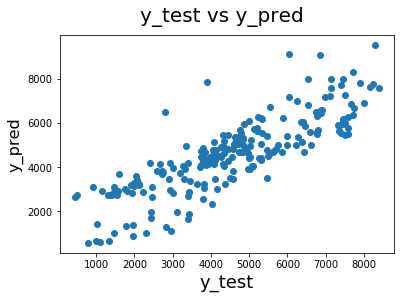

In [235]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [236]:
## R2 Square test

r2_score(y_test,y_pred)

0.6848529195214925